In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [7]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree','age','label']
data = pd.read_csv('diabetes.csv', header= None, names= col_names)
print(data.shape)
data.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

## Assigning dependent and independent variable

In [9]:
features_col = ['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree','age']

x = data[features_col]
y = data.label

## Splitting the dataset into Training and Testing Dataset

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

## Fitting the Model (logistic Regression)


In [11]:
model = LogisticRegression(solver = 'lbfgs', max_iter= 1000)

In [12]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

### Evaluation Metrices

In [13]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', conf_mat)

Accuracy_Score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: ', Accuracy_Score)
print('Accuracy in Percentage: ', int(Accuracy_Score *100), '%')

Confusion Matrix:  [[88 12]
 [19 35]]
Accuracy Score:  0.7987012987012987
Accuracy in Percentage:  79 %


In [18]:
import matplotlib as plt

<Axes: xlabel='Predicted', ylabel='Actual'>

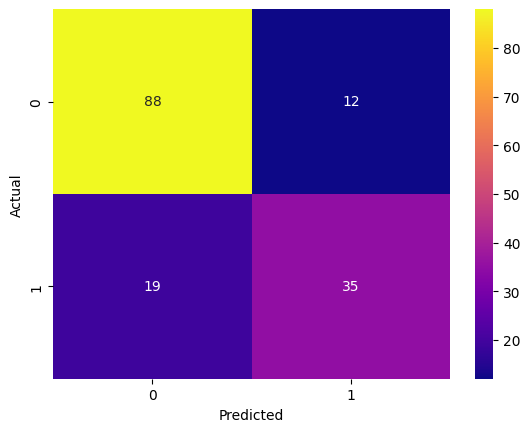

In [ ]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])


sn.heatmap(conf_mat, annot=True, cmap='plasma')
